Why do we need Data Generators?

Data generators help us create data with different distributions and profiles to experiment on. If you are testing various algorithms available to you and you want to find which one works in what cases, then these data generators can help you generate case specific data and then test the algorithm.

For example you want to check whether gradient boosting trees can do well given just 100 data-points and 2 features? Now either you can search for a 100 data-points dataset, or you can use your own dataset that you are working on. But how would you know if the classifier was a good choice, given that you have so less data and doing cross validation and testing still leaves fair chance of overfitting? Or rather you could use generated data and see what usually works well for such a case, a boosting algorithm or a linear model.

Few reasons why you need generated data
Can your models handle noisy labels?
What happens when 99% of your labels are negative and only 1% are positive?
if your models can tell you which features are redundant?
In case of model provided feature importances how does the model handle redundant features.
Does removing redundant features improve your model’s performance?
How does your model behave when Redundant features, noise and imbalance are all present at once in your dataset?
If you have N datapoints and M features, what are the safe values of N,M so your model doesn’t overfit?

Finding a real dataset meeting such combination of criterias with known levels will be very difficult. As a result we take into account few capabilities that a generator must have to give good approximations of real world datasets.

Generator Capabilities

While looking for generators we look for certain capabilities. I list the important capabilities that we look for in generators and classify them accordingly.

Supports Imbalancing the Classes

A lot of times you will get classification data that has huge imbalance. For example fraud detection has imbalance such that most examples (99%) are non-fraud. To check how your classifier does in imbalanced cases, you need to have ability to generate multiple types of imbalanced data.

Guassian Quantiles
Make classification API
Support Generating Noisy Data

Can your classifier perform its job even if the class labels are noisy. What if some fraud examples are marked non-fraud and some non-fraud are marked fraud? How do you know your chosen classifiers behaviour in presence of noise? And how do you select a Robust classifier?

Make classification API

Adding Redundant/Useless features

These are Linear Combinations of your useful features. Many Models like Linear Regression give arbitrary feature coefficient for correlated features. In case of Tree Models they mess up feature importance and also use these features randomly and interchangeably for splits. Removing correlated features usually improves performance.

Make classification API

In [2]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [223]:
X, y = make_classification(
    n_samples=100, 
    n_features=3, 
    n_informative=3, 
    n_redundant=0, 
    n_repeated=0, 
    n_classes=3, 
    n_clusters_per_class=1, 
    weights=None, 
    flip_y=0, 
    class_sep=2, 
    hypercube=True, 
    shift=0.0, 
    scale=1.0, 
    shuffle=True, 
    random_state=1
)

In [232]:
Features = pd.DataFrame(X, columns=['feature_1', 'feature_2', 'feature_3']).head()
Features

,feature_1,feature_2,feature_3
0,1.835335,0.591304,1.159730
1,2.813332,0.823737,2.275054
2,2.495353,1.332516,1.231570
3,2.414235,2.775262,1.673560
4,1.081948,1.575314,2.630433


In [235]:
Target = pd.DataFrame(y, columns=['eligibility']).head()
Target

,eligibility
0,0
1,0
2,0
3,0
4,0


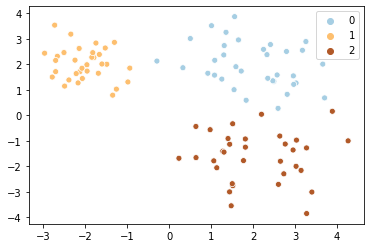

In [226]:
sns.scatterplot(X[:,0], X[:,1], y, palette=("Paired"))

In [242]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


knn=KNeighborsClassifier()

knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

y_hat_train = knn.predict(X_train)
y_hat_test = knn.predict(X_test)

0.9850746268656716
1.0


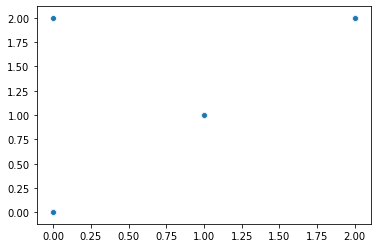

In [246]:
sns.scatterplot(y_hat_train, y_train, palette=("Paired"))